#### Simple Linear regression vs Multivariate Linear Regression

In [1]:
import pandas as pd

#### Data preprocessing

In [2]:
df=pd.read_csv(r'C:\Users\vedant\Downloads\Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
df = pd.get_dummies(df, columns=['mainroad', 'guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'], drop_first=True)

In [6]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [9]:
dummy_cols = [col for col in df.columns if 'mainroad_' in col or 'guestroom_' in col or 'basement_' in col or 'hotwaterheating_' in col or 'airconditioning_' in col or 'prefarea_' in col or 'furnishingstatus_ ' in col]

In [12]:
df[dummy_cols]= df[dummy_cols].astype(int)

In [16]:
df[['furnishingstatus_semi-furnished','furnishingstatus_unfurnished']]=df[['furnishingstatus_semi-furnished','furnishingstatus_unfurnished']].astype(int)

In [17]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0


#### Correlation matrix

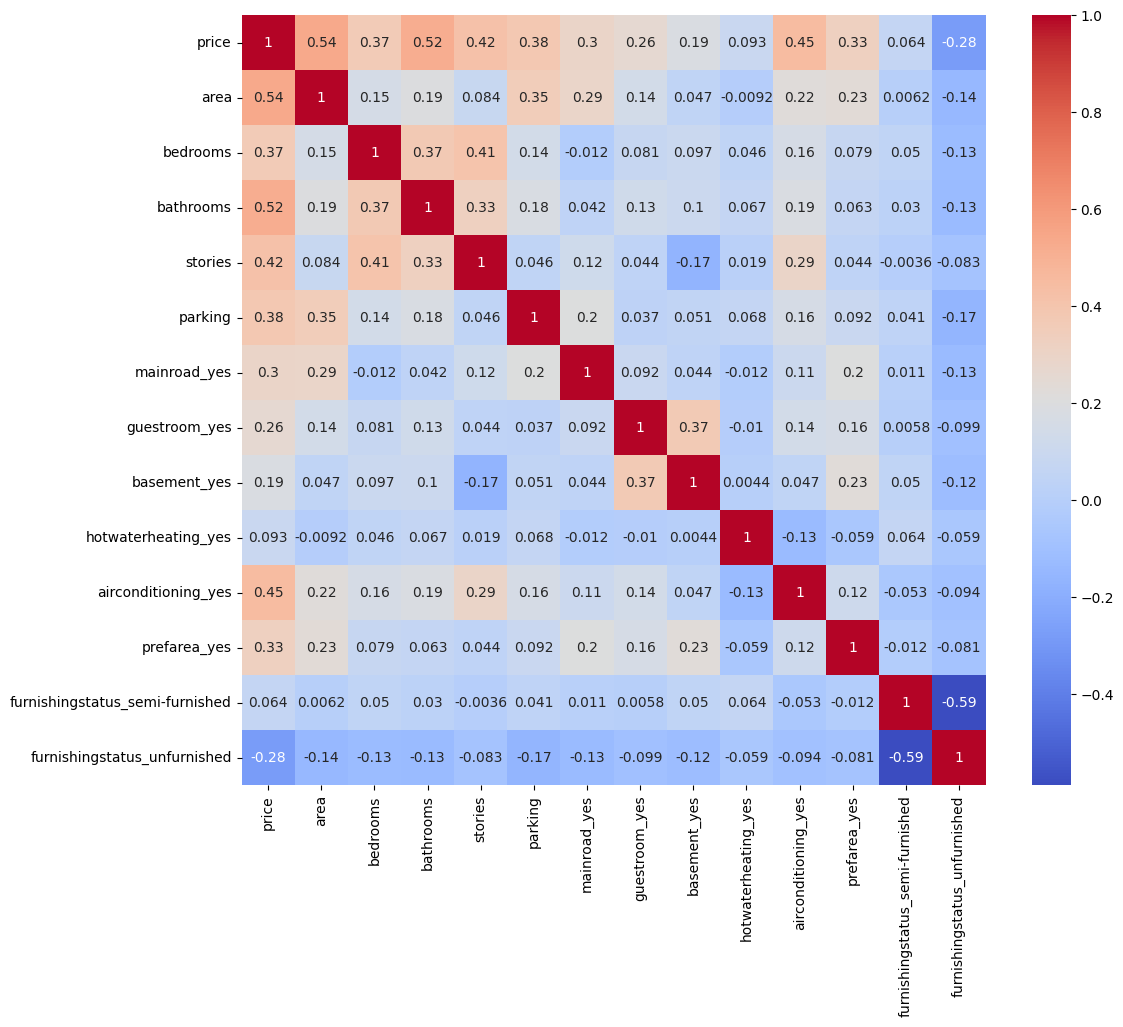

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))  # Width x Height in inches
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [20]:
df.corr()['price'].sort_values(ascending=False)

price                              1.000000
area                               0.535997
bathrooms                          0.517545
airconditioning_yes                0.452954
stories                            0.420712
parking                            0.384394
bedrooms                           0.366494
prefarea_yes                       0.329777
mainroad_yes                       0.296898
guestroom_yes                      0.255517
basement_yes                       0.187057
hotwaterheating_yes                0.093073
furnishingstatus_semi-furnished    0.063656
furnishingstatus_unfurnished      -0.280587
Name: price, dtype: float64

#### Visulaizing price vs feature scatter plots with fair correlation values

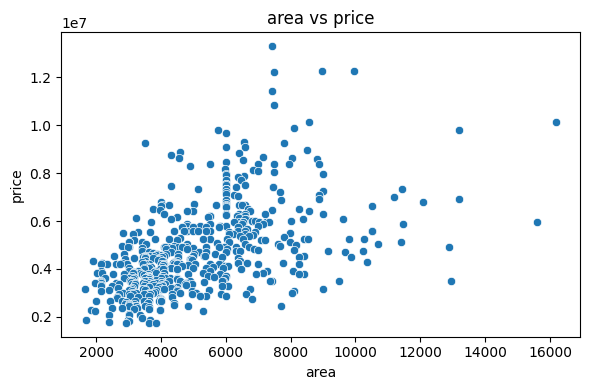

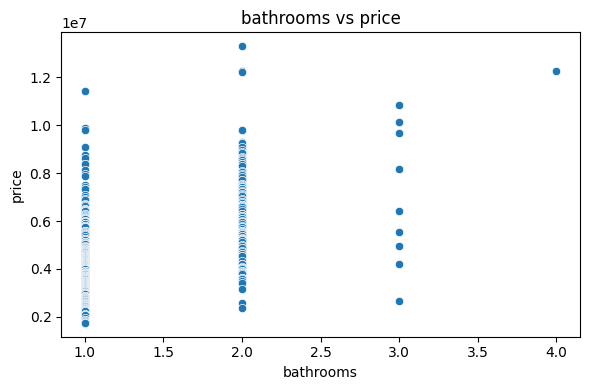

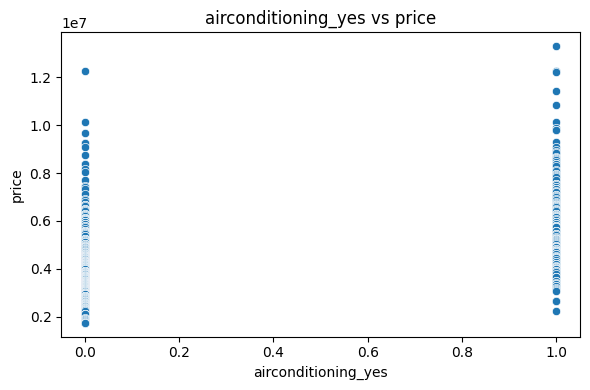

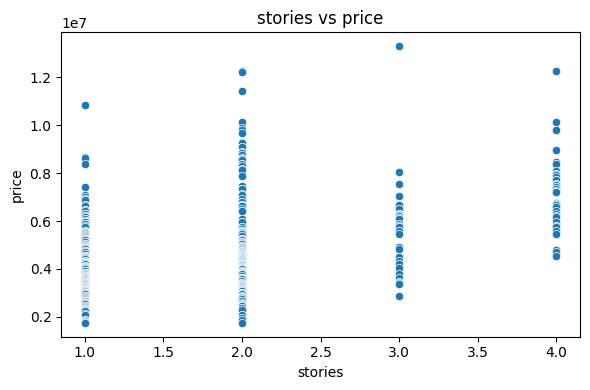

In [21]:
features = ['area', 'bathrooms', 'airconditioning_yes','stories']  # Replace with your top correlated features
target = 'price'

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feature], y=df[target])
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.tight_layout()
    plt.show()

#### Checking for skewness in variables for linear regression

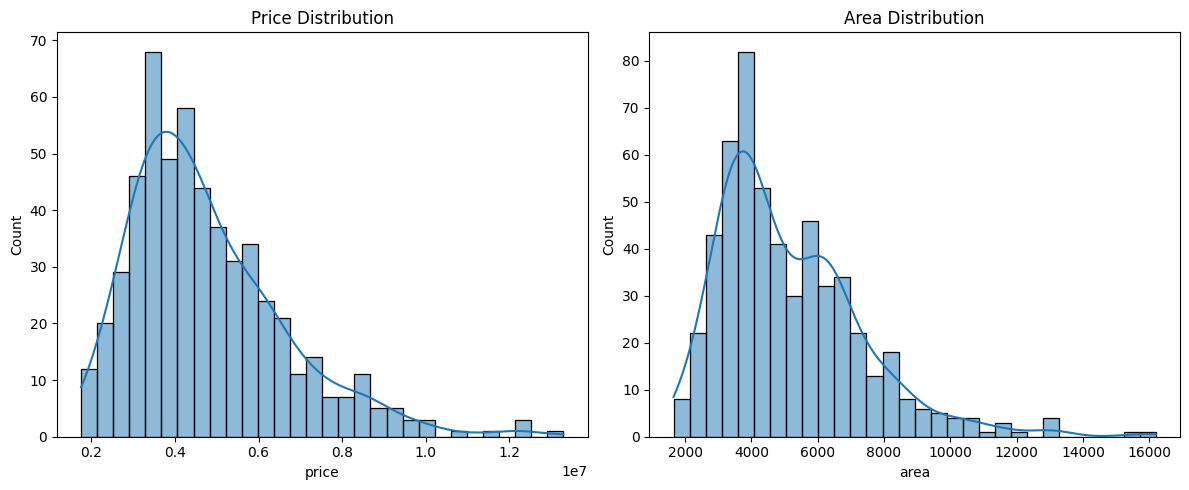

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

# Price distribution
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Price Distribution')

# Area distribution
plt.subplot(1, 2, 2)
sns.histplot(df['area'], kde=True, bins=30)
plt.title('Area Distribution')

plt.tight_layout()
plt.show()

#### Training simple regression model.

In [23]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

##### Using log transform for price variable to counter impact of outliers and correct skewness in its distribution as linear regression requires normal distribution of teh target variable.

In [24]:
df['log_price'] = np.log1p(df['price'])  # log(1 + price) to handle zeros safely

In [27]:
from sklearn.preprocessing import StandardScaler
X = df[['area']]          # Feature as 2D array
y = df['log_price']       # Log-transformed target

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit scaler on train, then transform train
X_test_scaled = scaler.transform(X_test)  

In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [31]:
import numpy as np

y_pred_log = model.predict(X_test_scaled)  # predictions on log scale
y_pred = np.expm1(y_pred_log)               # convert back to original scale
y_test_original = np.expm1(y_test)

#### Calculating error metrics for simple regression.

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Convert predicted and actual values back from log scale (if using log target)
y_test_actual = np.expm1(y_test)
y_pred_actual = np.expm1(y_pred_log)

# Evaluation metrics
mae = mean_absolute_error(y_test_actual, y_pred_actual)
mse = mean_squared_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, y_pred_actual)

# Print results
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.3f}")

MAE  : 1489772.68
MSE  : 3915689201336.85
RMSE : 1978810.05
R²   : 0.225


#### Comparing actual and predicted values .

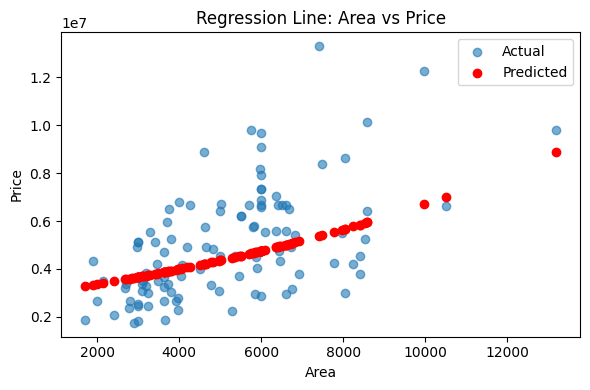

In [33]:
plt.figure(figsize=(6, 4))
plt.scatter(X_test, y_test_actual, alpha=0.6, label='Actual')
plt.scatter(X_test, y_pred_actual, color='red', label='Predicted')
plt.title('Regression Line: Area vs Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

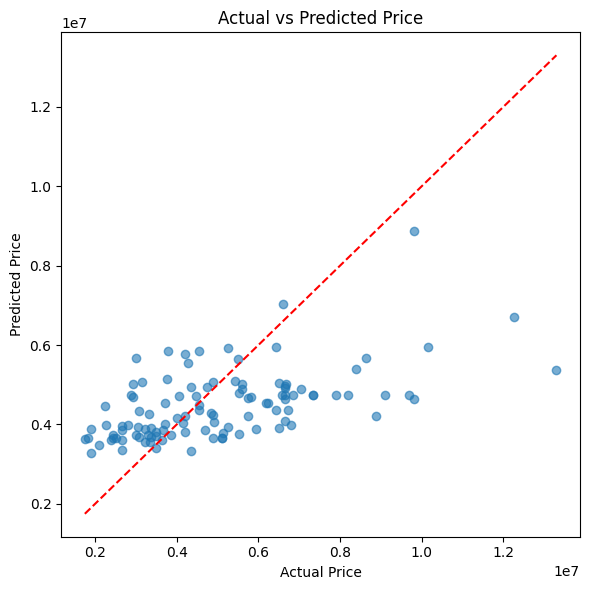

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test_actual, y_pred_actual, alpha=0.6)
plt.plot([y_test_actual.min(), y_test_actual.max()],
         [y_test_actual.min(), y_test_actual.max()], 'r--')  # perfect prediction line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.tight_layout()
plt.show()

#### Model Coefficients

In [35]:
coef = model.coef_[0]
intercept = model.intercept_

print(f"Model equation: log(price) = {intercept:.4f} + {coef:.4f} × area")
print(f"Interpretation: Each additional unit of area increases expected price by approx {coef * 100:.2f}%")

Model equation: log(price) = 15.3011 + 0.1909 × area
Interpretation: Each additional unit of area increases expected price by approx 19.09%


#### Residual plot

In [36]:
residuals = y_test_actual - y_pred_actual


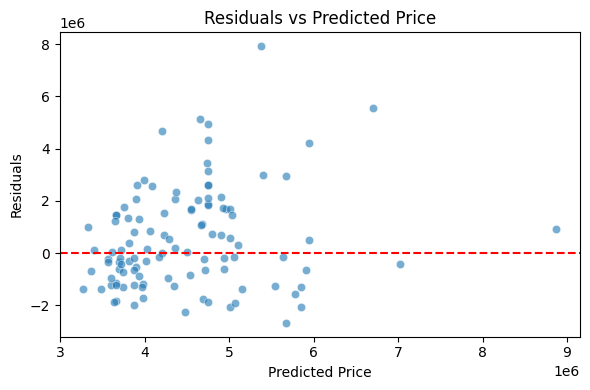

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred_actual, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Price")
plt.tight_layout()
plt.show()

#### Regression plot

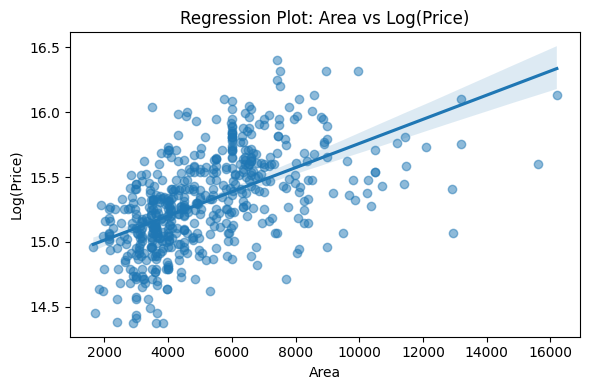

In [39]:
plt.figure(figsize=(6, 4))
sns.regplot(x='area', y='log_price', data=df, scatter_kws={'alpha':0.5})
plt.title('Regression Plot: Area vs Log(Price)')
plt.xlabel('Area')
plt.ylabel('Log(Price)')
plt.tight_layout()
plt.show()

#### Multivariable linear regression.

In [40]:
features = ['area', 'bathrooms', 'bedrooms', 'stories', 'parking','airconditioning_yes']

In [45]:
X = df[features]
y = df['log_price']  # still using log-transformed price

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [46]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### Calculating error metrics.

In [47]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)

# Metrics
mae = mean_absolute_error(y_test_actual, y_pred)
mse = mean_squared_error(y_test_actual, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, y_pred)

print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.3f}")

MAE  : 1107705.44
MSE  : 2145089405546.03
RMSE : 1464612.37
R²   : 0.576


#### Feature Coefficients

In [48]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)

               Feature  Coefficient
0                 area     0.128739
1            bathrooms     0.099490
2             bedrooms     0.024983
3              stories     0.062171
4              parking     0.044771
5  airconditioning_yes     0.084698


#### Comparing actual vs predicted values.

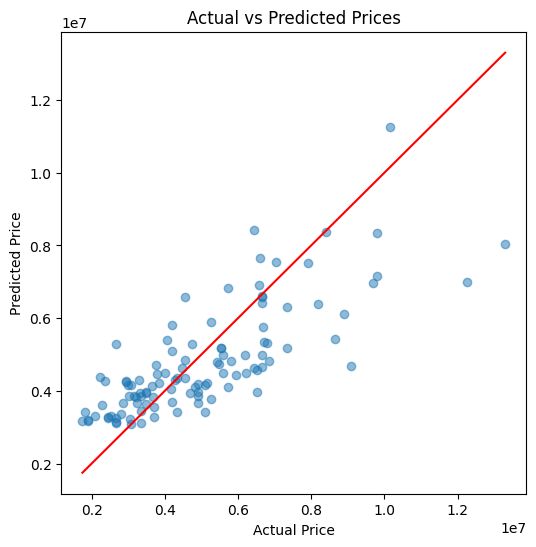

In [49]:
import numpy as np

y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)       # back-transform from log
y_test_actual = np.expm1(y_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test_actual, y_pred, alpha=0.5)
plt.plot([min(y_test_actual), max(y_test_actual)], [min(y_test_actual), max(y_test_actual)], color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

#### Residual plots

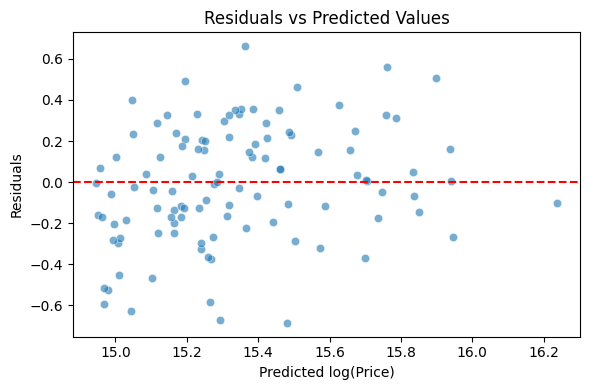

In [50]:
y_pred_log = model.predict(X_test)
residuals = y_test - y_pred_log

# Plot
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred_log, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted log(Price)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.tight_layout()
plt.show()

#### Feature Importance

In [51]:
coefficients = model.coef_  
features = X.columns  

In [52]:
import pandas as pd

coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Sort by absolute value to see which features matter most
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False).drop('Abs_Coefficient', axis=1)

print(coef_df)

               Feature  Coefficient
0                 area     0.128739
1            bathrooms     0.099490
5  airconditioning_yes     0.084698
3              stories     0.062171
4              parking     0.044771
2             bedrooms     0.024983


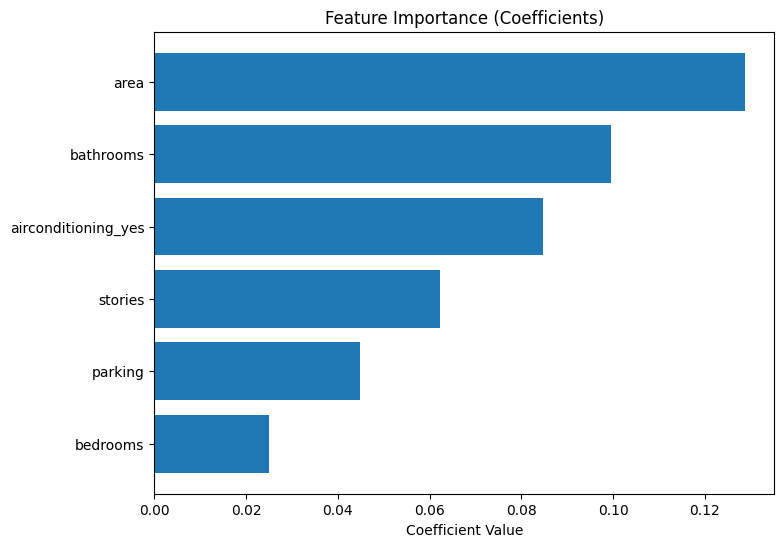

In [53]:
plt.figure(figsize=(8,6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Coefficients)')
plt.gca().invert_yaxis()  # highest importance on top
plt.show()